this time, testing to see if the evaporation function works, and then will try out plotting.

In [1]:
import os
notebook_wd = os.getcwd()

In [2]:
os.chdir(os.path.join(notebook_wd, '..'))
from src.d00_utils.conf_utils import *
from src.d03_modeling.evaporate import evaporate
from src.d05_reporting.plot_time_series import plot_composition_evolution

In [3]:
cmpds, water = load_compounds()
params = load_parameters()
params

{'r_init': 5e-05,
 'T': 298,
 'x_water': 0.7,
 'step_size': 100,
 'number_of_steps': 1000,
 'composition': {'triethylene_glycol': 0.1, 'hexaethylene_glycol': 0.1}}

In [4]:
ns, rs, Vs, ts = evaporate(cmpds, water, params)
ns[0:5]

array([[1.05540888e-09, 1.05540888e-09],
       [1.04288536e-09, 1.05540476e-09],
       [1.03045556e-09, 1.05540062e-09],
       [1.01811948e-09, 1.05539647e-09],
       [1.00587711e-09, 1.05539229e-09]])

In [5]:
import numpy as np
Ms = ns / (Vs[:,None] * 1000)
print(Ms)

[[ 2.01568248e+00  2.01568248e+00]
 [ 2.00072689e+00  2.02474477e+00]
 [ 1.98574995e+00  2.03382059e+00]
 ...
 [-1.81368008e-05  3.24361272e+00]
 [-1.79735023e-05  3.24361262e+00]
 [-1.78102016e-05  3.24361252e+00]]


Maybe I can make some pretty plots.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

%matplotlib inline

sns.set(style="ticks")  # sets sns as the rule
sns.set_context("talk")
sns.set_palette("Spectral")

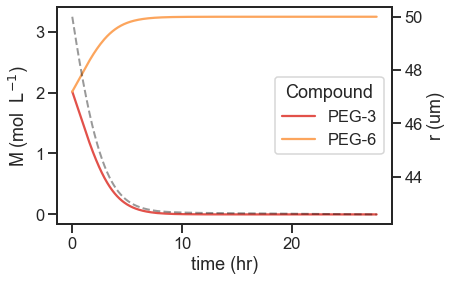

In [7]:
N_cmpd = len(cmpds)
compound_names = [defs['name'] for name, defs in cmpds.items()]

hrs = ts / 3600
for tick in range(N_cmpd):
    ax = sns.lineplot(x=hrs, y=Ms[:, tick], label=compound_names[tick], alpha=1)
    
ax.set(xlabel='time (hr)', ylabel='M (mol  L$^{-1}$)')
ums = rs * 1e6

ax2 = ax.twinx()
ax2.plot(hrs, ums, color='black', linewidth=2, linestyle='--', alpha=0.4)
ax2.set(ylabel='r (um)')

ax.legend(title='Compound')

project_dir = get_project_directory()
today = date.today().strftime("%Y%m%d")
seperator = '_'
cmpd_strings = seperator.join(compound_names)
fig = today[2:] + '_' + cmpd_strings + '_evap.png'
fig_path = os.path.join(project_dir, 'results', fig)

plt.savefig(fig_path, bbox_inches='tight', dpi=300, transparent=True)

'190918_PEG-3_PEG-6_evap.png'

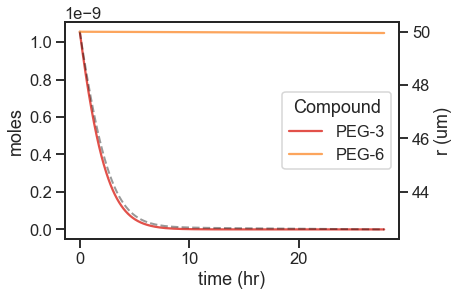

In [13]:
plot_composition_evolution(compounds=cmpds, ts=ts, ys=ns, y_axis='n', rs=rs)

'190918_PEG-3_PEG-6_evap.png'